<a href="https://colab.research.google.com/github/jai8004/Anamoly-Detection-in-Credit-Card-Transaction-/blob/main/Anamoly_Detection_in_Credit_Card_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Credit Card Fraud Detection

### **Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### **Content**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


### **Data Preprocessing and EDA**

In [1]:
#importing the necessarry libraies 
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
#loading the data

df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Projects/Anamoly-Detection-in-Credit-Card-Transaction--main/creditcard.csv', sep=',')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



Now let us define the basic information to the dataset

In [4]:
# Describing the data which includes the data count, mean, min, max, standard deviation for each column.

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Getting the data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking out the missing values for the dataset so that we can remove it and work further with the dataset. 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


After clearly analyzing the missing value we can remove the last column from the dataset as only one column is given that is time and everything is empty

In [7]:
df = df.drop(df.index[[27818]])

Now again checking the missing value

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


In [9]:
# Fnding the data correlation
traindata_corr = df.corr()[:-1]
traindata_corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173999e-01,-1.059337e-02,-4.196209e-01,-1.052640e-01,1.730724e-01,-6.302059e-02,8.471567e-02,-3.695050e-02,-8.656166e-03,3.061314e-02,-2.476948e-01,1.243476e-01,-6.590686e-02,-9.875377e-02,-1.834470e-01,1.190099e-02,-7.329925e-02,9.043748e-02,2.898163e-02,-5.086715e-02,4.473316e-02,1.440524e-01,5.114265e-02,-1.618579e-02,-2.330791e-01,-4.141524e-02,-5.134468e-03,-9.412592e-03,-0.010598,-0.012323
V1,0.117400,1.000000e+00,9.567456e-09,8.116864e-07,1.894463e-06,1.452649e-07,2.151523e-06,-5.862596e-07,5.363733e-07,-2.402044e-06,2.016698e-06,2.380996e-06,4.327533e-07,2.525296e-06,-1.910864e-06,-4.315698e-06,1.068159e-06,1.008944e-06,5.101237e-07,-3.429793e-06,5.511865e-07,1.518022e-06,4.368534e-06,-7.831744e-08,2.152902e-06,-2.668981e-06,4.348882e-06,-7.694528e-08,-6.852587e-08,-0.227708,-0.101347
V2,-0.010593,9.567456e-09,1.000000e+00,-4.437284e-09,-1.035655e-08,-7.941263e-10,-1.176183e-08,3.204932e-09,-2.932217e-09,1.313137e-08,-1.102478e-08,-1.301630e-08,-2.365752e-09,-1.380515e-08,1.044621e-08,2.359282e-08,-5.839353e-09,-5.515644e-09,-2.788717e-09,1.874981e-08,-3.013196e-09,-8.298643e-09,-2.388167e-08,4.281418e-10,-1.176937e-08,1.459064e-08,-2.377424e-08,4.206399e-10,3.746133e-10,-0.531409,0.091289
V3,-0.419621,8.116864e-07,-4.437284e-09,1.000000e+00,-8.786315e-07,-6.737232e-08,-9.978536e-07,2.719009e-07,-2.487642e-07,1.114043e-06,-9.353233e-07,-1.104281e-06,-2.007064e-07,-1.171205e-06,8.862385e-07,2.001575e-06,-4.954007e-07,-4.679377e-07,-2.365900e-07,1.590701e-06,-2.556344e-07,-7.040426e-07,-2.026080e-06,3.632279e-08,-9.984932e-07,1.237845e-06,-2.016965e-06,3.568640e-08,3.178157e-08,-0.210881,-0.192961
V4,-0.105264,1.894463e-06,-1.035655e-08,-8.786315e-07,1.000000e+00,-1.572459e-07,-2.328973e-06,6.346122e-07,-5.806115e-07,2.600157e-06,-2.183029e-06,-2.577372e-06,-4.684453e-07,-2.733573e-06,2.068466e-06,4.671641e-06,-1.156257e-06,-1.092159e-06,-5.521970e-07,3.712670e-06,-5.966465e-07,-1.643224e-06,-4.728836e-06,8.477679e-08,-2.330466e-06,2.889109e-06,-4.707563e-06,8.329146e-08,7.417765e-08,0.098731,0.133448
V5,0.173072,1.452649e-07,-7.941263e-10,-6.737232e-08,-1.572459e-07,1.000000e+00,-1.785826e-07,4.866124e-08,-4.452053e-08,1.993766e-07,-1.673918e-07,-1.976296e-07,-3.591977e-08,-2.096068e-07,1.586072e-07,3.582154e-07,-8.866026e-08,-8.374530e-08,-4.234174e-08,2.846827e-07,-4.575007e-08,-1.260002e-07,-3.626010e-07,6.500573e-09,-1.786971e-07,2.215331e-07,-3.609698e-07,6.386681e-09,5.687845e-09,-0.386356,-0.094974
V6,-0.063021,2.151523e-06,-1.176183e-08,-9.978536e-07,-2.328973e-06,-1.785826e-07,1.000000e+00,7.207231e-07,-6.593950e-07,2.952974e-06,-2.479245e-06,-2.927098e-06,-5.320089e-07,-3.104494e-06,2.349137e-06,5.305539e-06,-1.313150e-06,-1.240354e-06,-6.271249e-07,4.216444e-06,-6.776058e-07,-1.866194e-06,-5.370494e-06,9.628020e-08,-2.646689e-06,3.281134e-06,-5.346335e-06,9.459333e-08,8.424286e-08,0.215980,-0.043643
V7,0.084716,-5.862596e-07,3.204932e-09,2.719009e-07,6.346122e-07,4.866124e-08,7.207231e-07,1.000000e+00,1.796758e-07,-8.046434e-07,6.755591e-07,7.975926e-07,1.449649e-07,8.459305e-07,-6.401065e-07,-1.445684e-06,3.578147e-07,3.379789e-07,1.708826e-07,-1.148921e-06,1.846380e-07,5.085113e-07,1.463384e-06,-2.623499e-08,7.211851e-07,-8.940625e-07,1.456800e-06,-2.577534e-08,-2.295498e-08,0.397312,-0.187257
V8,-0.036951,5.363733e-07,-2.932217e-09,-2.487642e-07,-5.806115e-07,-4.452053e-08,-6.593950e-07,1.796758e-07,1.000000e+00,7.361743e-07,-6.180742e-07,-7.297235e-07,-1.326295e-07,-7.739482e-07,5.856383e-07,1.322667e-06,-3.273674e-07,-3.092195e-07,-1.563418e-07,1.051157e-06,-1.689267e-07,-4.652408e-07,-1.338861e-06,2.400259e-08,-6.598177e-07,8.179845e-07,-1.332838e-06,2.358205e-08,2.100169e-08,-0.103079,0.019875
V9,-0.008656,-2.402044e-06,1.313137e-08,1.114043e-06,2.600157e-06,1.993766e-07,2.952974e-06,-8.046434e-07,7.361743e-07,1.000000e+00,2.767926e-06,3.267926e-06,5.939555e-07,3.465

# What is Correlation ? 

Correlation is used to check how strongly the variable is depended on the another variable. There are three typer of correlation.

1. Negative Correlation - When the varibles change in different directions

2. Positive Correlation - when the variables chane in the same direction.

3. Neutral Correlation - when there is no relationship between the variables.

There are several methods to check the correlation. Pearson's Correlation, Spearman's Correlation, etc.




Hence showing the correlation of the data with other data points

In [10]:
#Understand the distribution of the data
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.skew()
# It tells the degree of distortion from the normal distribution which is used for further procedings in understanding the ormal distribution fitting


Time      -0.035574
V1        -3.280664
V2        -4.624857
V3        -2.240156
V4         0.676287
V5        -2.425898
V6         1.826578
V7         2.553906
V8        -8.521934
V9         0.554689
V10        1.187136
V11        0.356500
V12       -2.278399
V13        0.065227
V14       -1.995172
V15       -0.308428
V16       -1.100970
V17       -3.844915
V18       -0.259882
V19        0.109198
V20       -2.037155
V21        3.592986
V22       -0.213260
V23       -5.875130
V24       -0.552507
V25       -0.415787
V26        0.576701
V27       -1.170207
V28       11.192072
Amount    16.977702
Class     23.997537
dtype: float64

In [12]:
df.kurtosis()

Time       -1.293525
V1         32.486646
V2         95.772759
V3         26.619479
V4          2.635450
V5        206.903830
V6         42.642551
V7        405.606151
V8        220.586288
V9          3.731336
V10        31.988263
V11         1.633927
V12        20.241799
V13         0.195307
V14        23.879457
V15         0.284788
V16        10.419108
V17        94.799511
V18         2.578324
V19         1.725006
V20       271.015252
V21       207.286824
V22         2.833045
V23       440.087103
V24         0.618882
V25         4.290435
V26         0.919029
V27       244.988371
V28       933.394224
Amount    845.090301
Class     573.885810
dtype: float64

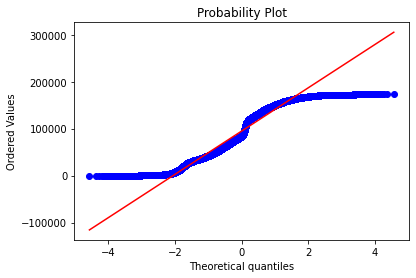

In [13]:
# Understanding the probability distribution with the help of matplotlib with all the features

from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(df['Time'], plot=plt)


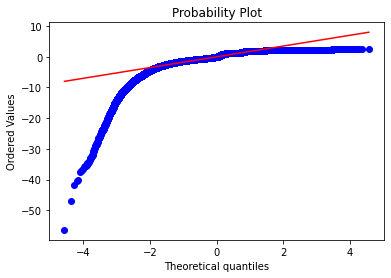

In [14]:
res = stats.probplot(df['V1'], plot=plt)

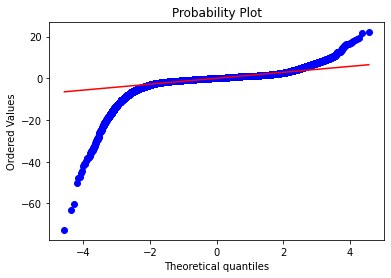

In [15]:
res = stats.probplot(df['V2'], plot=plt)

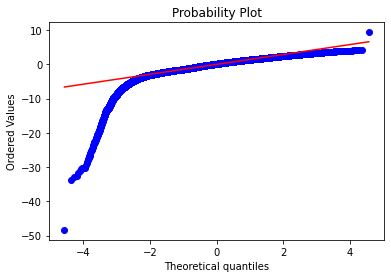

In [16]:
res = stats.probplot(df['V3'], plot=plt)

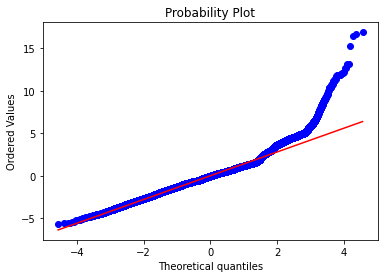

In [17]:
res = stats.probplot(df['V4'], plot=plt)

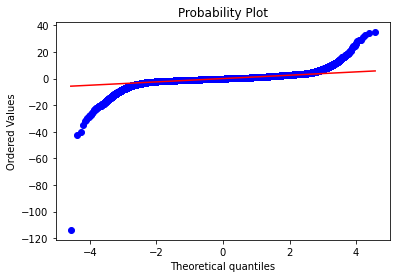

In [18]:
res = stats.probplot(df['V5'], plot=plt)

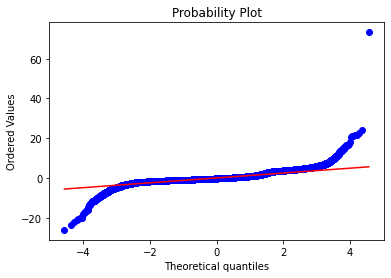

In [19]:
res = stats.probplot(df['V6'], plot=plt)

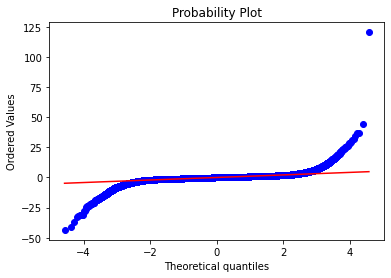

In [20]:
res = stats.probplot(df['V7'], plot=plt)

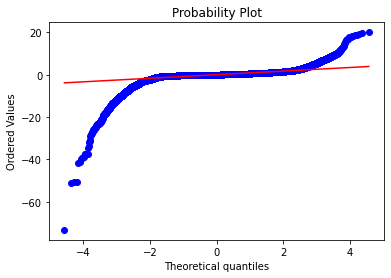

In [21]:
res = stats.probplot(df['V8'], plot=plt)

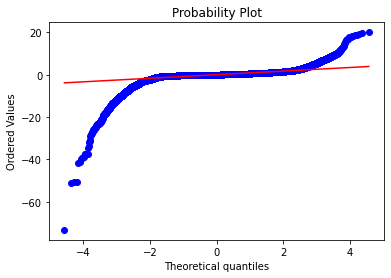

In [22]:
res = stats.probplot(df['V8'], plot=plt)

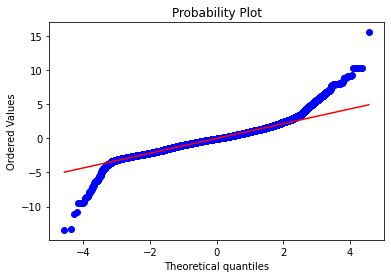

In [23]:
res = stats.probplot(df['V9'], plot=plt)

In [24]:
# To check the number of anamoly(1) and normal(0) in the class variable
# Normal variable are all the values of class with value 0. It is the normal data point. On the other hand class with value one it shows the outliers in the class feature.

df['Amount'] = np.log(df['Amount'] + 1)
df['Time'] = np.log(df['Time'] + 1)
normal = df[df['Class'] == 0]
anomaly = df[df['Class'] == 1]

# Understanding the shape of the normal and anamoly data

print(normal.shape)
print(anomaly.shape)

(284314, 31)
(492, 31)


In [25]:
# Making a class for defining the model fitting  and making the function for prediction model

class hist_model(object):
    
    def __init__(self, bins=50):
        self.bins = bins
        
    def fit(self, X):
        
        bin_hight, bin_edge = [], []
        
        for var in X.T:
            # get bins hight and interval
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)
        
        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)
   

    def predict(self, X):
        
        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):
                # find wich bin obs is in
                bin_num = (var > self.bin_edge[i]).argmin()-1
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hitght
            
            scores.append(np.mean(obs_score))
        
        return np.array(scores)
                
#fitting the model
        
model = hist_model()
model.fit(df.drop('Class', axis=1).values)


In [26]:
from scipy.stats import multivariate_normal


mu = df.drop('Class', axis=1).mean(axis=0).values
sigma = df.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

In [27]:
# Applying Gaussian Mixture Algorithm for model fitting
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(df.drop('Class', axis=1).values)
print(gmm.score(df[df['Class'] == 0].drop('Class', axis=1).values))
print(gmm.score(df[df['Class'] == 1].drop('Class', axis=1).values))

11.023554156500673
-82.24754202737282


# **Data Visualization**

Data visualization is a compatible way of understandin the behaviour of the feature so that we can fit the model accurately

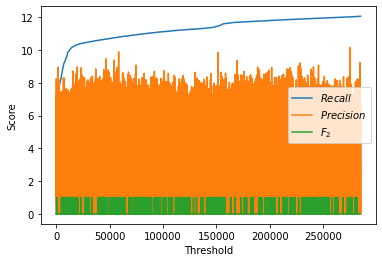

In [28]:
# We need to check at what time the fraud is occuring with the class and how much amount
import matplotlib.pyplot as plt


plt.plot(df['Time'], label='$Recall$')
plt.plot(df['Amount'], label='$Precision$')
plt.plot(df['Class'], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()


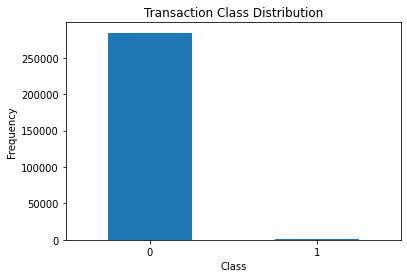

In [29]:
# Checking the Transaction distribution with the Class [0 = Normal, 1 = Fraud]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2) )
plt.xlabel("Class")
plt.ylabel("Frequency");

In [30]:
# Making two variables Fraud and the normal data. Fraud has a value of one in the class feature and normal has a value of 0 in the class feature

Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

In [31]:
# Checking the fraud shape
Fraud.shape

(492, 31)

In [32]:
# Checking the Normal shape
Normal.shape

(284314, 31)

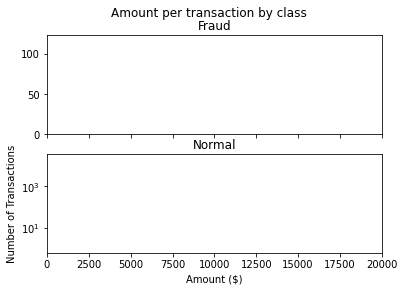

In [33]:
# PLotting the graph separately for the amount of transaction of the clasws on the basis of Fraud and normal Detection

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

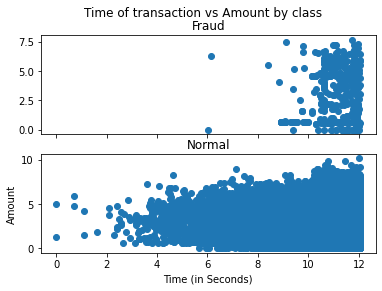

In [34]:
# Plotting the scatter plot for the fraud and Normal detection with the help of time transaction and amount feature for detecting the credit card frauds.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()



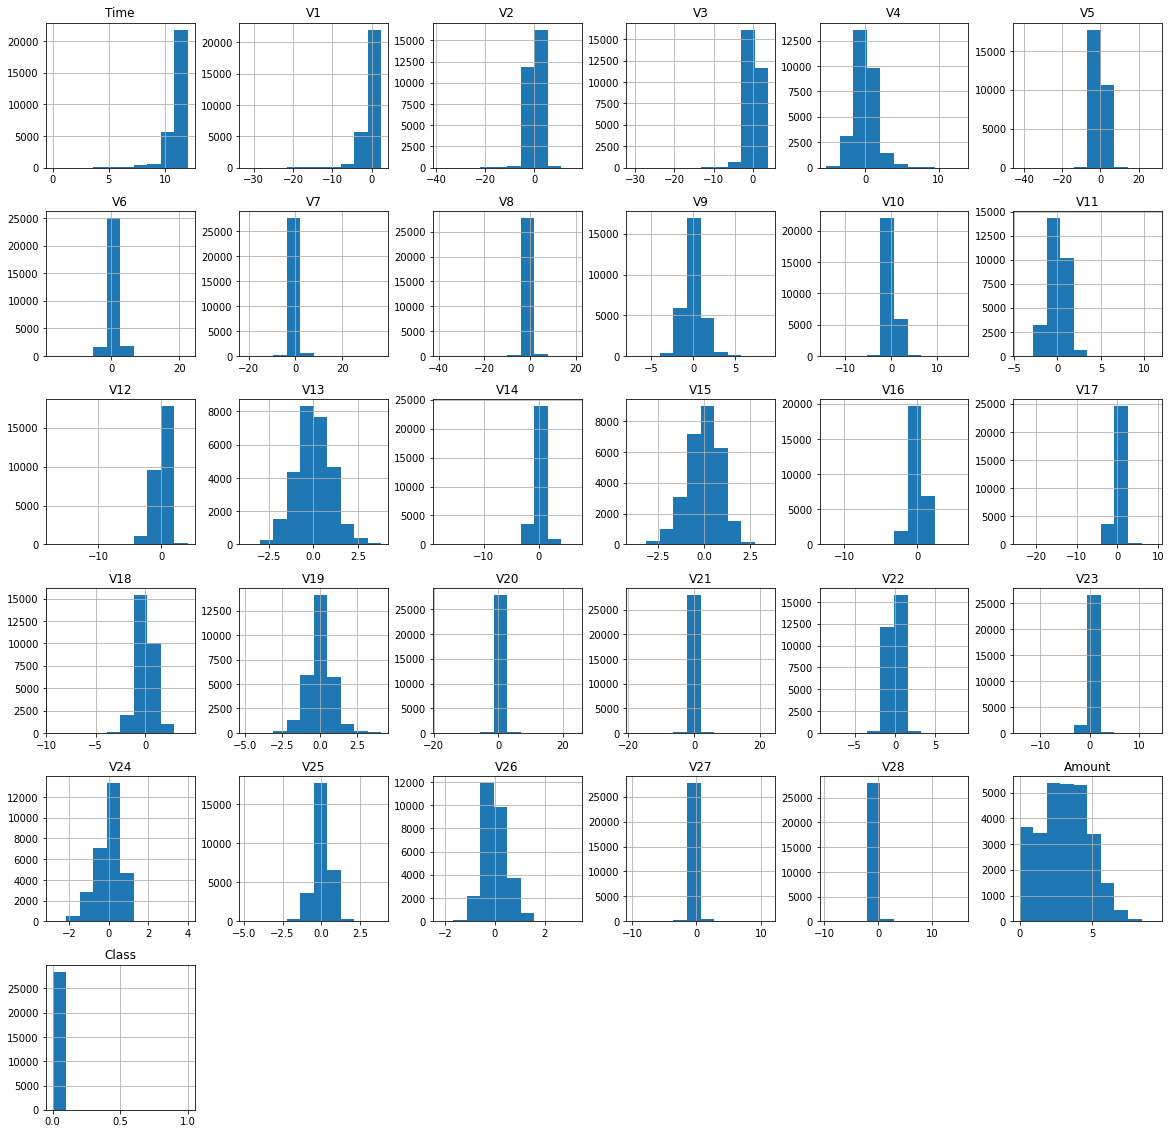

In [35]:
# Plotting the individual Data to understand it more clearly
import matplotlib.pyplot as plt
data1= df.sample(frac = 0.1,random_state=1)

data1.shape
data1.hist(figsize=(20,20))
plt.show()

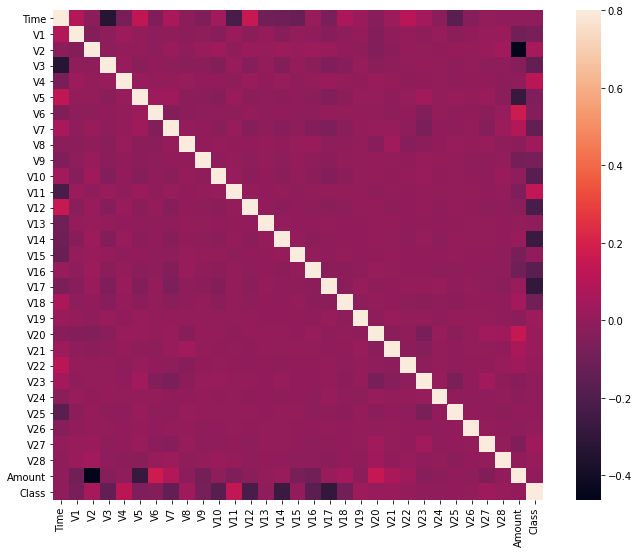

In [36]:
# FInding the Correlation between the data points
import seaborn as sns

correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()



In [37]:
# Finding the outlier fraction by divind the fraud and valid variable count
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0013360053440213762


In [38]:
# Importing the libraries from  sklearn package
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# **Model Fitting**

In [40]:
# Making a classifier using oneClassSVM algorithm.

from sklearn.svm import OneClassSVM

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(df), 
                                       contamination=outlier_fraction,random_state = 0, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}



In [41]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"

X = data1[columns]
Y = data1[target]
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:281: UserWarning: max_samples (284806) is greater than the total number of samples (28481). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


Isolation Forest: 59
Accuracy Score :
0.9979284435237527
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28443
           1       0.23      0.24      0.23        38

    accuracy                           1.00     28481
   macro avg       0.61      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 71
Accuracy Score :
0.99750711000316
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28443
           1       0.08      0.08      0.08        38

    accuracy                           1.00     28481
   macro avg       0.54      0.54      0.54     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 1740
Accuracy Score :
0.9389066395140621
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.94     


We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases 

Thus we can use autoencoder.